# AirBnB Seattle data analysis

This notebbok will help us to analyze AirBnB data of Seattle to help us answer some questions:

    - What are the most popular times in seattle for guests?
    - What's the trend in AirBnB in Seattle?
    - What are the most popular locations?
    
To run the notebook download Seattle AirBnB dataset from [here](https://www.kaggle.com/airbnb/seattle/download) and place the `.csv` files into the `./input` directory located at same level as this notebook. Then install required libraries mentioned in `requirements.txt` file.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

sns.set()

%config IPCompleter.greedy=True

## helper functions

In [2]:
def fix_percentage(value):
    """
    Takes integer value as string parameter in format 99% and converts it to 0.99 float format.
    """
    if type(value) == str:
        return int(value.replace("%", "")) / 100
    else:
        return float(value)


def fix_boolean(value):
    """
    Takes bool value as char in format 't' or 'f' and converts it to True/False boolean format.
    """
    if value == "t":
        return True 
    elif value == "f":
        return False
    else:
        return value


def fix_money(value):
    """
    Takes money value as string in format '99$' and converts it to float value format.
    """
    if type(value) == str:
        return float(value.replace("$", "").replace(",", ""))
    else:
        return float(value)


def count_items(value):
    """
    Counts items in amenities in format
    {TV, wifi etc}
    provides integer as output.
    """
    if type(value) == str:
        return len(value.split(','))
    else:
        return 0


def check_wifi(value):
    """
    Checks if host is providing wifi.
    """
    if type(value) == str:
        return "Wireless Internet" in value
    else:
        return False


# 1 First look at data
For data analysis we can use publicly available dataset at kaggle found in [here](https://www.kaggle.com/airbnb/seattle/). This dataset contains three files:
    - listings
    - reviews
    - calendar

## 1.1 Listings

In [3]:
listings = pd.read_csv("./input/listings.csv")
listings.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  ... review_scores_value  \
0                                                NaN  ...                10.0   
1  Queen Anne is a wonderful, truly functional vi...  ...                10.0   
2  Upper Queen Anne is a charming neighborhood fu...  ...                10.0   
3                                                NaN  ...                 NaN   
4  We are in the beautiful neighborhood of Queen ...  ...                 9.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN         WASHINGTON                f   
1                f     NaN         WASHINGTON                f   
2                f     NaN         WASHINGTON                f   
3                f     NaN         WASHINGTON                f   
4                f     NaN         WASHINGTON                f   

  cancellation_policy  require_guest_profile_picture  \
0            moderate                              f   
1              strict                              t   
2              strict                              f   
3            flexible                              f   
4              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   
3                                f                              1   
4                                f                              1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 92 columns]

We can see some interestings columns but most of the will need to be transformed from strings to python types.

## 1.2 Calendar

In [4]:
calendar = pd.read_csv("./input/calendar.csv")
calendar.head()

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

Exact dates of availability per host is rather interesting to answer our questions.

## 1.3 Reviews

In [5]:
reviews = pd.read_csv("./input/reviews.csv")
reviews.head()

listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...

Here we can see some direct reviews but to get anything useful from here we would need to use sentiment analysis which is far beyond my commitment, making those data useless.

# 2 Clensing the data

Some data modifications are in order.

## 2.1 NaN values
Let's start with dropping the columns with more than 40% of missing values as filling those could provide biased results.

In [6]:
listings = listings.loc[:, listings.notnull().mean() > .4]
listings.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  ...  \
0                                                NaN  ...   
1  Queen Anne is a wonderful, truly functional vi...  ...   
2  Upper Queen Anne is a charming neighborhood fu...  ...   
3                                                NaN  ...   
4  We are in the beautiful neighborhood of Queen ...  ...   

  review_scores_location review_scores_value requires_license  \
0                    9.0                10.0                f   
1                   10.0                10.0                f   
2                   10.0                10.0                f   
3                    NaN                 NaN                f   
4                    9.0                 9.0                f   

  jurisdiction_names instant_bookable cancellation_policy  \
0         WASHINGTON                f            moderate   
1         WASHINGTON                f              strict   
2         WASHINGTON                f              strict   
3         WASHINGTON                f            flexible   
4         WASHINGTON                f              strict   

   require_guest_profile_picture require_guest_phone_verification  \
0                              f                                f   
1                              t                                t   
2                              f                                f   
3                              f                                f   
4                              f                                f   

  calculated_host_listings_count reviews_per_month  
0                              2              4.07  
1                              6              1.48  
2                              2              1.15  
3                              1               NaN  
4                              1              0.89  

[5 rows x 89 columns]

## 2.2 Data types
Some intresting values are provided as strings. Let's converted so something more suitable. I'm also counting `amenities` to check if count of provided amenities matter to guests. Also extracting presence as wifi in amenities for curiosity.

In [7]:
listings['price'] = listings.price.apply(fix_money)
listings['security_deposit'] = listings.security_deposit.apply(fix_money)
listings['cleaning_fee'] = listings.cleaning_fee.apply(fix_money)
                   
listings['host_response_rate'] = listings.host_response_rate.apply(fix_percentage)
listings['host_acceptance_rate'] = listings.host_acceptance_rate.apply(fix_percentage)

listings['host_identity_verified'] = listings.host_identity_verified.apply(fix_boolean)
listings['host_has_profile_pic'] = listings.host_has_profile_pic.apply(fix_boolean)
listings['is_location_exact'] = listings.is_location_exact.apply(fix_boolean)
listings['host_is_superhost'] = listings.host_is_superhost.apply(fix_boolean)
listings['instant_bookable'] = listings.instant_bookable.apply(fix_boolean)

listings['wifi'] = listings.amenities.apply(check_wifi)
listings['amenities'] = listings.amenities.apply(count_items)
listings['transit'] = listings['transit'].notnull()

listings.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  ... review_scores_value  \
0                                                NaN  ...                10.0   
1  Queen Anne is a wonderful, truly functional vi...  ...                10.0   
2  Upper Queen Anne is a charming neighborhood fu...  ...                10.0   
3                                                NaN  ...                 NaN   
4  We are in the beautiful neighborhood of Queen ...  ...                 9.0   

   requires_license jurisdiction_names instant_bookable cancellation_policy  \
0                 f         WASHINGTON            False            moderate   
1                 f         WASHINGTON            False              strict   
2                 f         WASHINGTON            False              strict   
3                 f         WASHINGTON            False            flexible   
4                 f         WASHINGTON            False              strict   

  require_guest_profile_picture  require_guest_phone_verification  \
0                             f                                 f   
1                             t                                 t   
2                             f                                 f   
3                             f                                 f   
4                             f                                 f   

  calculated_host_listings_count reviews_per_month  wifi  
0                              2              4.07  True  
1                              6              1.48  True  
2                              2              1.15  True  
3                              1               NaN  True  
4                              1              0.89  True  

[5 rows x 90 columns]

Same modifications can used also on calendar dataset.

In [8]:
calendar.available = calendar.available.apply(fix_boolean)
calendar.price = calendar.price.apply(fix_money)
calendar.date = pd.to_datetime(calendar.date)
calendar.head()

listing_id       date  available  price
0      241032 2016-01-04       True   85.0
1      241032 2016-01-05       True   85.0
2      241032 2016-01-06      False    NaN
3      241032 2016-01-07      False    NaN
4      241032 2016-01-08      False    NaN

# 3. Data understandings

When the data transfomartions are finished we can start analyzing the data to answer our questions.

# 3.1 correlation
Correlations helps us understand how on variable affects other.

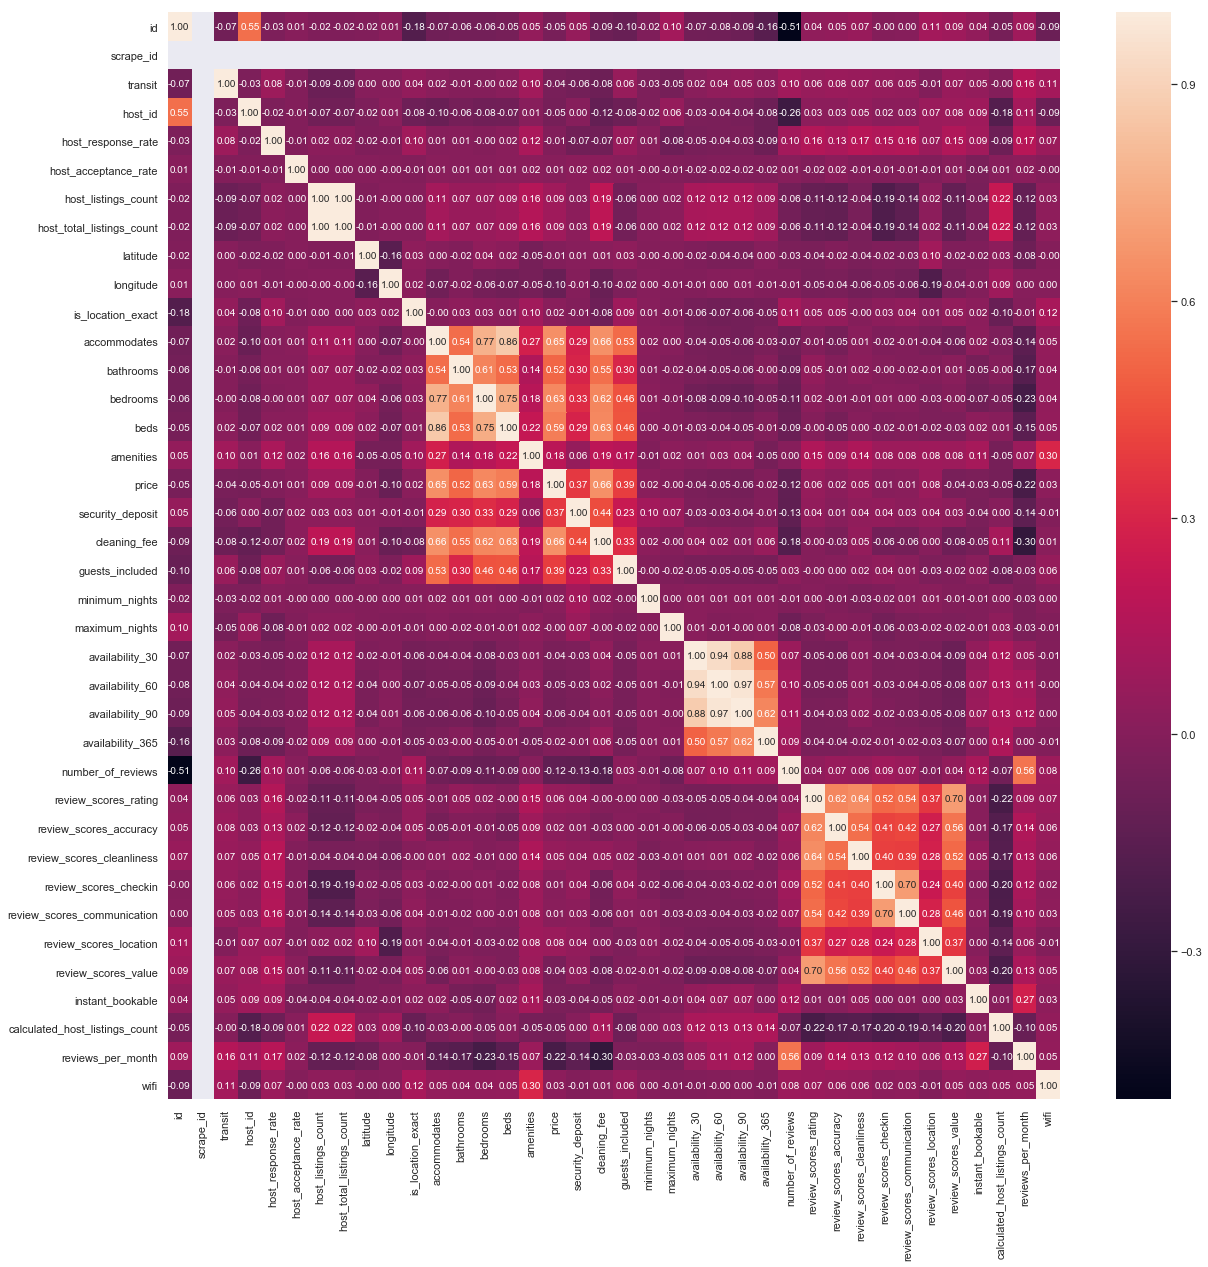

In [9]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(listings.select_dtypes(include=["int64", "float64", "bool"]).corr(), annot=True, fmt=".2f", ax=ax);

We can see that `host_listings_count` and `host_total_listings_count` corelate fully which makes one of them suitable to drop. My experimental field `wifi` doesn't corelate well, which may indiciate that people don't care about wifi in Seattle. High correlations between beds, bathrooms, bedrooms and price makes natural sense. The more beds you have the more guests you can acomodate the more bedrooms you need the more money you can ask per property.

# 3.2 histograms
We can plot histograms of all numerical data to get more insight on the data.

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



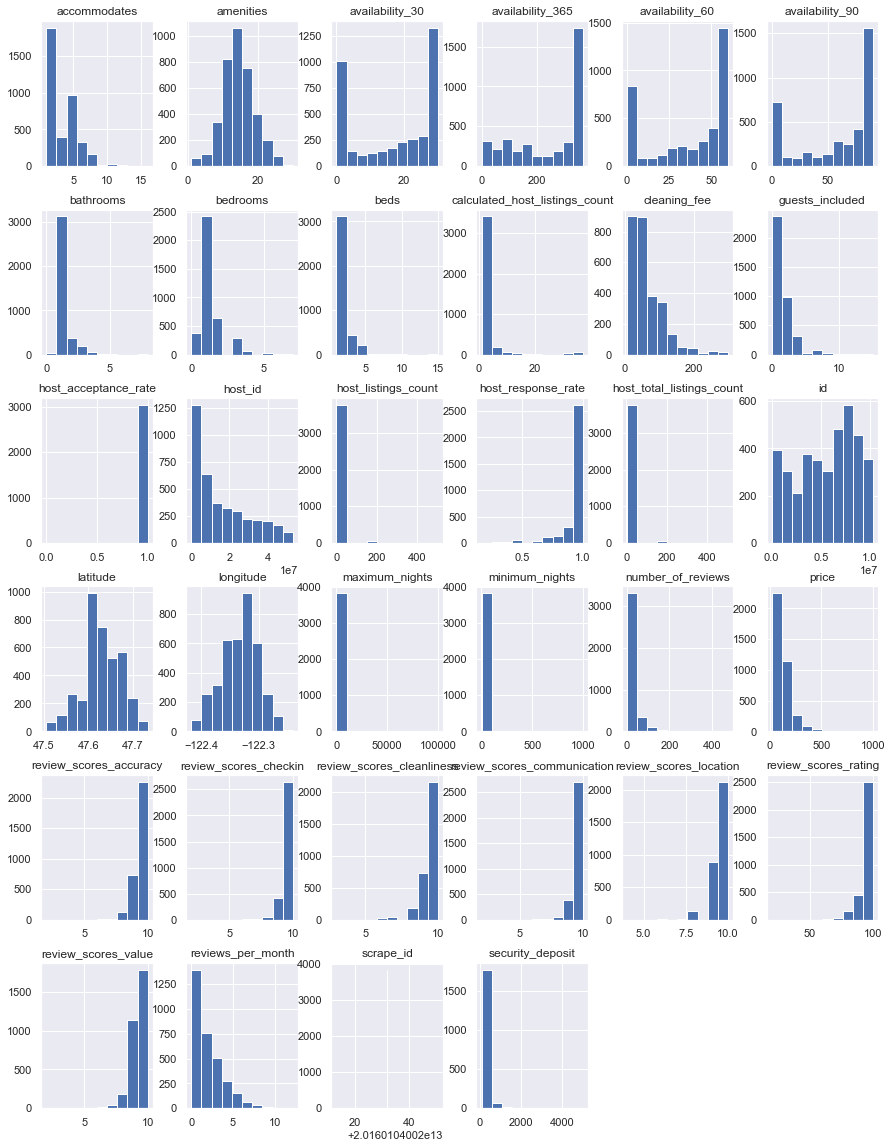

In [10]:
fig = plt.figure(figsize = (15,20))
listings.select_dtypes(include=['int64', 'float64']).hist(ax=fig.gca());

or not.

# 4 Answers
Ok we have questions but what about the answers? let's not lose track and try tyo answer them.

## 4.1 What are the most popular times in seattle for guests?
For this questions to answer let's check the trend in prices.

In [11]:
price_series = calendar[calendar.available].groupby(["date"])["price"].agg("mean").reset_index()[["date","price"]]
fig = px.line(price_series, x="date", y="price", title="Development of host's prices in Seattle")
fig.show()

We can see the prices rising siginificantly during weekends in short term and in summer in long term while decreasing in winter. We can assume that pople like summer over winter in Seattle while having better chances to get into the seattle at Weekend.

## 4.2 What's the trend of AirBnB in Seattle? 
Price is significant aspect of telling us when guest do spike Seattle but what about longer terms? To answer this question we can check avilability of hosts.

In [12]:
available_series = calendar[calendar.available] \
.groupby(["date"])["available"] \
.agg("count") \
.reset_index()[["date","available"]]

# logicaly this is 365 but let's make this calculated just to be sure
max_availability = calendar.groupby(["date"])["available"].agg("count").max()
available_series["ocupancy"] = available_series.available / max_availability
fig = px.line(available_series, x="date", y="ocupancy", title="Seattle AirBnB ocupancy")
fig.show()

We can see significant drops in ocupancy on April and Jun. Also beginning drop on new year (i can just gues that people are returning to work after holiday) Overal we can rising trend in AirBnB in Seattle.

## 4.3 What are the most popular locations?
To check popularity we can try average reviews per neighbourhood.

In [13]:
neighbourhood_popularity = listings \
.groupby(["neighbourhood"])["review_scores_value"] \
.agg("mean") \
.reset_index() \
.dropna() \
.sort_values(by=['review_scores_value'], ascending=False)

fig = px.bar(neighbourhood_popularity, y='review_scores_value', x='neighbourhood', title="Reviews of host's per neighbourhood")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

Well this is not saying as much. Difference in lowest average rating and highest is only 1.34 which is not that much of a difference. Let's backup to availability and try again.

In [14]:
neighbourhood_availability = calendar[~calendar.available] \
.groupby(["listing_id"])["available"] \
.agg("count") \
.reset_index()[["available", "listing_id"]]

neighbourhood_max_availability = calendar.groupby(["listing_id"])["available"].agg("count").max()
neighbourhood_availability["ocupied_percentage"] = neighbourhood_availability.available / neighbourhood_max_availability
neighbourhood_availability = neighbourhood_availability \
    .merge(listings[["id", "neighbourhood"]], how="left", left_on="listing_id", right_on="id") \
    .groupby(["neighbourhood"])["ocupied_percentage"] \
    .agg("mean") \
    .reset_index() \
    .sort_values(by=['ocupied_percentage'], ascending=False)

fig = px.bar(neighbourhood_availability, y='ocupied_percentage', x="neighbourhood", title="Ocupancy of neighbourhoods in Seattle")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

That's much better. People seems to like guests of Seattle overall but logicaly they chose location before experiencing guests which makes sense. Let's check how many guest's are in each top three neighbourhoods before calling results.

In [15]:
top_three_neighbourhood = neighbourhood_availability.neighbourhood[:3].values
listings[listings.neighbourhood.isin(top_three_neighbourhood)] \
.groupby(["neighbourhood"]) \
.agg("count")["id"] \
.reset_index()

neighbourhood  id
0            Broadway   5
1  North College Park   1
2    South Lake Union  21

Ok this is intresting. Althought `North College Park` is out winner based on ocupancy but there's only one guest in there making it easly to bias. Also i have suspision that students are using that one host making it bias even futher. While `Broadway` and `South Lake Union` are in second and third place, but has more hosts and therefore telliung us that Seattle downtown are is the most popular location. People do like BIG buildings. To better understand location we can try to see ocupancy directly at the map.

In [16]:
geo_availability = calendar[~calendar.available] \
.groupby(["listing_id"])["available"] \
.agg("count") \
.reset_index()[["available", "listing_id"]]
geo_availability_max = calendar.groupby(["listing_id"])["available"].agg("count").max()
geo_availability["ocupied_percentage"] = geo_availability.available / geo_availability_max
geo_availability = geo_availability.merge(listings[["id", "longitude", "latitude"]], how="left", left_on="listing_id", right_on="id")

fig = px.scatter_mapbox(
    geo_availability, 
    lat="latitude", 
    lon="longitude", 
    hover_name="id", 
    hover_data=["ocupied_percentage"],
    color_continuous_scale='Inferno',
    color="ocupied_percentage",
    zoom=10)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

To even further confirm our suspicion we can see much brighter colors in the center.